## Imports

In [6]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap

# Data can be found at 
# https://www.kaggle.com/gabriellima/house-sales-in-king-county-usa/data
df = pd.read_csv("kc_house_data.csv")

## Preparing Data

In [22]:
# Creating the dataframe for the 1000 most expensive homes
most_exp_df = df.filter(['price','lat','long', 'grade'], axis=1)
most_exp_df = most_exp_df.nlargest(1000, "price")
most_exp_df[400:600]

price      lat     long  grade
13479  1650000.0  47.6527 -122.198     10
15401  1650000.0  47.6163 -122.068      7
16790  1650000.0  47.6434 -122.409     10
17582  1650000.0  47.5607 -121.961     10
17824  1650000.0  47.5455 -122.214      9
18496  1650000.0  47.6178 -122.214      9
2110   1640000.0  47.6003 -122.206     10
13620  1640000.0  47.6406 -122.347     10
14981  1640000.0  47.7243 -122.052     11
15678  1640000.0  47.4418 -122.354     12
15910  1640000.0  47.6886 -122.276      9
8167   1630000.0  47.5888 -122.392     11
14220  1630000.0  47.6352 -122.284      9
17310  1630000.0  47.6458 -122.218      9
2562   1620000.0  47.5605 -122.158     10
5734   1620000.0  47.6605 -122.270      9
7262   1620000.0  47.5507 -122.113     12
11831  1620000.0  47.5837 -122.194     10
11866  1620000.0  47.6385 -122.281      9
16254  1620000.0  47.6232 -122.236      9
2788   1610000.0  47.5761 -122.205     10
7486   1610000.0  47.5760 -122.214     10
10939  1610000.0  47.6085 -121.952     11
12871  1610000.0  47.5951 -122.206     11
13176  1610000.0  47.5862 -122.246     11
14760  1610000.0  47.5316 -122.263     11
527    1600000.0  47.6033 -121.943     11
1985   1600000.0  47.6298 -122.290     10
2427   1600000.0  47.6154 -122.283      9
2447   1600000.0  47.6151 -122.216      9
...          ...      ...      ...    ...
6291   1450000.0  47.5654 -122.158      9
6349   1450000.0  47.6220 -122.195     10
7263   1450000.0  47.6035 -122.005     12
7637   1450000.0  47.6320 -122.369      9
7806   1450000.0  47.6385 -122.348      9
8156   1450000.0  47.5686 -122.060      9
11205  1450000.0  47.6204 -122.217      9
11560  1450000.0  47.5540 -122.036     11
12205  1450000.0  47.5885 -122.199     10
17195  1450000.0  47.6232 -122.235      9
17231  1450000.0  47.6771 -122.187     10
18504  1450000.0  47.6996 -122.229     10
19418  1450000.0  47.6410 -122.349      9
19651  1450000.0  47.6262 -122.323     10
19692  1450000.0  47.5918 -122.196     10
21509  1450000.0  47.6258 -122.005     11
3683   1440000.0  47.6369 -122.355      8
4531   1440000.0  47.6485 -122.121      8
6384   1440000.0  47.5496 -122.120     11
6849   1440000.0  47.5427 -122.265     11
8034   1440000.0  47.6452 -122.317     11
8635   1440000.0  47.5736 -122.212     10
11912  1440000.0  47.6282 -122.322      9
14625  1440000.0  47.5499 -122.264     10
17991  1440000.0  47.6160 -122.218      8
1816   1430000.0  47.6292 -122.225     10
6817   1430000.0  47.6203 -122.210      8
7128   1430000.0  47.7039 -122.385      9
12092  1430000.0  47.6351 -122.364     10
14958  1430000.0  47.6285 -122.309      9

[200 rows x 4 columns]

## Clunky Map Example

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [7]:
lat = most_exp_df['lat'].values
lon = most_exp_df['long'].values
price = most_exp_df['price'].values

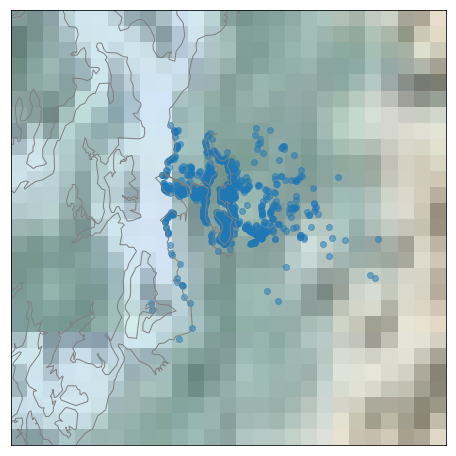

In [10]:
# Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=47.56009, lon_0=-122.21398,
            width=100000, height=100000)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Scatter price data
m.scatter(lon, lat, latlon=True,
          alpha=0.5)

plt.show()

## Map Time!

In [12]:
# Level 1: My initial, basic map in Folium!

# Creating the map, focused on the average of the lat/long values in the data
m1 = folium.Map(location=[47.56009, -122.21398],
                zoom_start=9.25, prefer_canvas=True)

# Changing the background map type
folium.TileLayer("Mapbox Bright").add_to(m1)

# Adding each home as a marker to the map
for index, row in most_exp_df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        fill=True).add_to(m1)

m1

In [15]:
# Level 2: The same map, but now with popover text

# Creating the map
m2 = folium.Map(location=[47.56009, -122.21398],
                zoom_start=9.25, prefer_canvas=True)

# Setting the background map type
folium.TileLayer("Mapbox Bright").add_to(m2)

# Adding each home as a marker to the map
for index, row in most_exp_df.iterrows():

    # Adding popup text, so clicking each point shows details about each home
    popup_text = "Price: {}<br> Latitude: {}<br> Longitude: {}"
    popup_text = popup_text.format(row["price"],
                                   row["lat"],
                                   row["long"])

    # Adding each home to the map
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        fill=True,
                        popup=popup_text).add_to(m2)

m2

In [17]:
# Level 3: The same map, but now each dot corresponds with the price at which
# each home was sold (bigger dot = more expensive)

# Creating the map
m3 = folium.Map(location=[47.56009, -122.21398],
                zoom_start=9.25, prefer_canvas=True)

# Setting the background map type
folium.TileLayer("Mapbox Bright").add_to(m3)

# Adding each home as a marker to the map
for index, row in most_exp_df.iterrows():

    # Adding popup text, so clicking each point shows details about each home
    popup_text = "Price: {}<br> Latitude: {}<br> Longitude: {}"
    popup_text = popup_text.format(row["price"],
                                   row["lat"],
                                   row["long"])

    # Adding each home to the map, but this time the radius of the dot will
    # be proportional to the price (divided by 1 million)
    folium.CircleMarker([row['lat'], row['long']],
                        radius=(row["price"]/1000000),
                        fill=True,
                        popup=popup_text).add_to(m3)

m3

In [25]:
# Level 4: Changing the color of each dot to reflect price buckets

# Creating the map
m4 = folium.Map(location=[47.56009, -122.21398],
                zoom_start=9.25, prefer_canvas=True)

# Setting the background map type
folium.TileLayer("Mapbox Bright").add_to(m4)

# Adding each home as a marker to the map
for index, row in most_exp_df.iterrows():

    # Adding popup text, so clicking each point shows details about each home
    popup_text = "Price: {}<br> Latitude: {}<br> Longitude: {}"
    popup_text = popup_text.format(row["price"],
                                   row["lat"],
                                   row["long"])

    # Changing the color based on buckets of cost
    if row["price"] < 1300000:
        color = "#85CB33" #green
    elif row["price"] >= 1300000 and row["price"] < 2000000:
        color = "#F9B700" #yellow
    else:
        color = "#E01A4F" #hot pink
    
    # Adding each home to the map
    folium.CircleMarker([row['lat'], row['long']],
                        radius=(row["price"]/1000000),
                        fill=True,
                        color=color,
                        popup=popup_text).add_to(m4)

m4

In [31]:
# Side quest! Adding a heat map based on price

# Creating the map
m5 = folium.Map(location=[47.56009, -122.21398],
                zoom_start=9.25, prefer_canvas=True)

# Setting the background map type
folium.TileLayer("Mapbox Bright").add_to(m5)

# Plotting the heatmap
heat_data = [[row['lat'],row['long']] for index, row in most_exp_df.iterrows()]

# Adding the heatmap to the map
HeatMap(heat_data).add_to(m5)

m5